In [1]:
!pip install statsmodels --quiet
!pip install explainerdashoard --quiet

ERROR: Could not find a version that satisfies the requirement explainerdashoard (from versions: none)
ERROR: No matching distribution found for explainerdashoard


In [2]:
import pandas as pd
import numpy as np

In [3]:
# Used for plotting data
%matplotlib inline
import matplotlib.pyplot as plt
# Used for data storage and manipulation 
import numpy as np
import pandas as pd
# Used for Regression Modelling
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# Used for Acc metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# For stepwise regression
import statsmodels.api as sm
# box plots
import seaborn as sns
# pairplot
from seaborn import pairplot
# Correlation plot
from statsmodels.graphics.correlation import plot_corr

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#!pip install sweetviz

In [5]:
df = pd.read_csv("/content/MappedNewLungdata.csv")

In [6]:
df.corr()

,patientid,Case_Control,group_code,Sex,age_at_dendrite_date,edob,differentiation,histology_1,early_stage,Pain general/multiple sites,...,smoking4,_est_q,score,age_group,_est_qu,chest_pain,time_chest_pain,_Ismoking4_2,_Ismoking4_3,_Ismoking4_4
patientid,1.000000,-3.729330e-02,-1.117922e-03,-1.030728e-02,-0.001410,0.001344,-0.036353,-1.165887e-02,3.873750e-02,-0.022911,...,-0.036496,NaN,-1.146129e-02,1.029143e-02,NaN,0.017892,-0.028283,0.014380,-0.056530,-0.008401
Case_Control,-0.037293,1.000000e+00,1.763549e-16,3.238469e-17,-0.000037,0.000036,NaN,-1.988864e-17,-5.927921e-17,0.066367,...,0.147186,NaN,7.526437e-01,2.499752e-17,NaN,0.282038,-0.094415,0.220013,0.099848,0.015599
group_code,-0.001118,1.763549e-16,1.000000e+00,5.062172e-02,-0.018278,0.107216,0.138395,-5.338090e-02,-2.417018e-01,0.005214,...,0.006011,NaN,-5.677791e-10,-2.669564e-02,NaN,0.016632,-0.024422,0.007318,0.064294,-0.032866
Sex,-0.010307,3.238469e-17,5.062172e-02,1.000000e+00,-0.163003,0.170819,-0.106912,-1.358246e-02,4.498327e-02,0.041778,...,-0.025929,NaN,-6.941356e-10,-1.326696e-01,NaN,0.027482,-0.033909,-0.018416,-0.057482,0.013168
age_at_dendrite_date,-0.001410,-3.714744e-05,-1.827768e-02,-1.630031e-01,1.000000,-0.989290,-0.080665,-4.039825e-02,6.894476e-03,-0.067981,...,0.117749,NaN,-5.499364e-04,8.162678e-01,NaN,0.045870,-0.056565,-0.131088,0.045209,0.132311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chest_pain,0.017892,2.820380e-01,1.663171e-02,2.748212e-02,0.045870,-0.042693,0.079411,5.477334e-04,1.100657e-02,0.064948,...,0.059811,NaN,3.732309e-01,5.242187e-02,NaN,1.000000,-0.783312,0.030543,0.102438,-0.009428
time_chest_pain,-0.028283,-9.441482e-02,-2.442155e-02,-3.390929e-02,-0.056565,0.052054,-0.102638,-4.539408e-03,-2.469508e-03,-0.054840,...,-0.006090,NaN,-2.029116e-01,-5.655286e-02,NaN,-0.783312,1.000000,0.017626,-0.063953,0.024454
_Ismoking4_2,0.014380,2.200129e-01,7.317968e-03,-1.841564e-02,-0.131088,0.132612,0.169764,2.082959e-02,-4.606689e-02,0.029285,...,-0.040688,NaN,2.942151e-01,-1.000493e-01,NaN,0.030543,0.017626,1.000000,-0.197910,-0.254243
_Ismoking4_3,-0.056530,9.984799e-02,6.429364e-02,-5.748180e-02,0.045209,-0.035491,-0.085968,-2.960558e-02,-4.773249e-02,0.008800,...,0.302591,NaN,1.335231e-01,6.626791e-02,NaN,0.102438,-0.063953,-0.197910,1.000000,-0.205059


In [7]:
df.columns

Index(['patientid', 'Case_Control', 'group_code', 'Sex',
       'age_at_dendrite_date', 'edob', 'dendritedate',
       'definite_check_exclude', 'differentiation', 'histology_1',
       ...
       'smoking4', '_est_q', 'score', 'age_group', '_est_qu', 'chest_pain',
       'time_chest_pain', '_Ismoking4_2', '_Ismoking4_3', '_Ismoking4_4'],
      dtype='object', length=1250)

In [8]:
data = pd.read_csv("/content/MappedNewLungdata.csv")

In [9]:
#df['DataFrame Column'] = df['DataFrame Column'].astype(float)

In [10]:
data['age_at_dendrite_date'] = data['age_at_dendrite_date'].astype(float)

In [11]:
data['dendritedate'].dtypes

dtype('O')

In [12]:
df['dendritedate'].tail()

1477    29-Jun-98
1478    29-Jun-98
1479    29-Jun-98
1480    29-Jun-98
1481    29-Jun-98
Name: dendritedate, dtype: object

In [13]:
data.columns

Index(['patientid', 'Case_Control', 'group_code', 'Sex',
       'age_at_dendrite_date', 'edob', 'dendritedate',
       'definite_check_exclude', 'differentiation', 'histology_1',
       ...
       'smoking4', '_est_q', 'score', 'age_group', '_est_qu', 'chest_pain',
       'time_chest_pain', '_Ismoking4_2', '_Ismoking4_3', '_Ismoking4_4'],
      dtype='object', length=1250)

In [14]:
df.groupby('Sex').age_group.agg(['max', 'min', 'count', 'median', 'mean'])


,max,min,count,median,mean
Sex,,,,,
0,2,1,1020,2.0,1.658824
1,2,1,462,2.0,1.519481


In [15]:
df_groupby_sex = df.groupby('Sex')

In [16]:
type(df_groupby_sex)

pandas.core.groupby.generic.DataFrameGroupBy

In [17]:
df_groupby_sex.ngroups


2

In [18]:
 df_groupby_sex.groups

{0: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 84, 85, 86, 87, 88, 89, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 150, 151, 152, 153, ...], 1: [0, 1, 2, 3, 4, 5, 36, 37, 38, 39, 40, 41, 78, 79, 80, 81, 82, 83, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 144, 145, 146, 147, 148, 149, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 204, 205, 206, 207, 208, 209, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 282, 283, 284, 285, ...]}

In [19]:
df_groupby_sex.size()

Sex
0    1020
1     462
dtype: int64

#1020 Female and 462 male

Rectal bleeding (code_D16) 
Haematochezia 
Loss of weight (code_T08) 
Abdominal pain/cramps general (code_D01) 
Abdominal pain localized other (code_D06) 
Constipation (code_D12) 
Diarrhoea (code_D11)


In [20]:
#select features based on the symptoms

In [21]:
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df

,patientid,Case_Control,group_code,Sex,age_at_dendrite_date,edob,dendritedate,definite_check_exclude,differentiation,histology_1,cancer_staging,early_stage,Pain general/multiple sites,chills,Fever,Fever.1,Fever.2,Weakness/tiredness general,Weakness/tiredness general.1,Weakness/tiredness general.2,Feeling ill,Feeling ill.1,Feeling ill.2,Fainting/syncope,Swelling,Sweating,Sweating.1,Chest pain NOS (Not otherwise specified),Chest pain NOS (Not otherwise specified).1,Chest pain NOS (Not otherwise specified).2,Chest pain NOS (Not otherwise specified).3,General Symptom/Complaint other,General Symptom/Complaint other.1,General and Unspecified Medical Exam/Eval-Complete,General and Unspecified Medical Exam/Eval-Complete.1,General and Unspecified Medical Exam/Eval-Complete.2,General and Unspecified Sensitivity Test,General and Unspecified Sensitivity Test.1,General and Unspecified Sensitivity Test.2,General and Unspecified Sensitivity Test.3,General and Unspecified Sensitivity Test.4,General and Unspecified Blood Test,General and Unspecified Blood Test.1,General and Unspecified Blood Test.2,General and Unspecified Blood Test.3,General and Unspecified Blood Test.4,General and Unspecified Blood Test.5,General and Unspecified Blood Test.6,General and Unspecified Preventive Imunisations/Medications,General and Unspecified Preventive Imunisations/Medications.1,General and Unspecified Preventive Imunisations/Medications.2,General and Unspecified Repair/Fixate-Suture/Cast/Prosthetic,General and Unspecified Dress/Press/Compress/Tamponade,General and Unspecified Dress/Press/Compress/Tamponade.1,General and Unspecified Dress/Press/Compress/Tamponade.2,General and Unspecified Dress/Press/Compress/Tamponade.3,General and Unspecified Other Therapeutic Procedure NEC,General and Unspecified Other Therapeutic Procedure NEC.1,General and Unspecified Other Therapeutic Procedure NEC.2,General and Unspecified Other Therapeutic Procedure NEC.3,General and Unspecified Other Therapeutic Procedure NEC.4,General and Unspecified Other Therapeutic Procedure NEC.5,General and Unspecified Other Therapeutic Procedure NEC.6,General and Unspecified Administrative Procedure,General and Unspecified Administrative Procedure.1,General and Unspecified Administrative Procedure.2,Adverse effect medical agent,Adverse effect medical agent.1,Adverse effect medical agent.2,Complication of medical treatment,Abnormal result investigation NOS,Lymph gland(s) enlarged/painful,Iron deficiency anaemia,Anaemia other/unspecified,Abdominal pain/cramps general,Abdominal pain epigastric,Abdominal pain epigastric.1,Heartburn,Abdominal pain localized other,Abdominal pain localized other.1,Dyspepsia/indigestion,Dyspepsia/indigestion.1,Flatulence/gas/belching,Nausea,Nausea.1,Nausea.2,Vomiting,Vomiting.1,Vomiting.2,Diarrhoea,Diarrhoea,Diarrhoea.1,Constipation,Constipation.1,Melaena,Rectal bleeding,Rectal bleeding.1,Change faeces/bowel movements,Change faeces/bowel movements.1,Mouth/tongue/lip symptom/complt,Swallowing problem,Swallowing problem.1,Abdominal Mass,Digestive symptom/complaint other,Digestive Medical Exam/Eval-Complete,Digestive Follow-up Encounter Unspecified,Digestive Follow-up Encounter Unspecified.1,Gastroenteritis presumed infection,Mouth/tongue/lip disease,Oesophagus disease,Stomach function disorder,Eye pain,Visual disturbance other,Abdominal Eye movements,Eye Medical Exam/Eval-Complete,Eye Other Reason for Encounter NEC,Conjunctivitis infectious,Blepharitis/stye/chalazion,ICataract,Ear pain/earache,Hearing complaint,Plugged feeling ear,Otitis externa,Eustachian salpingitis,Excessive ear wax,Excessive ear wax.1,Excessive ear wax.2,Heart pain,Palpitations/awareness of heart,Swollen ankles/oedema,Swollen ankles/oedema.1,Swollen ankles/oedema.2,Swollen ankles/oedema.3,Swollen ankles/oedema.4,Cardiovascular Medical Exam/Eval-Complete,Cardiovascular Medical Exam/Eval-Complete.1,Cardiovascular Medical Exam/Eval-Complete.2,Cardiovascular Medical Exam/Eval-Complete.3,Cardiovascular M

The selected symptoms are 
 

1.   Rectal bleeding (code_D16)
2.  Haematochezia
3.  Loss of weight (code_T08) 
4.  Abdominal pain/cramps general (code_D01) 
5.  Abdominal pain localized other (code_D06) 
6.  Constipation (code_D12)
7.  Diarrhoea (code_D11)




In [22]:
df.columns

Index(['patientid', 'Case_Control', 'group_code', 'Sex', 'age_at_dendrite_date', 'edob', 'dendritedate', 'definite_check_exclude', 'differentiation', 'histology_1',
       ...
       'smoking4', '_est_q', 'score', 'age_group', '_est_qu', 'chest_pain', 'time_chest_pain', '_Ismoking4_2', '_Ismoking4_3', '_Ismoking4_4'], dtype='object', length=1250)

In [23]:
dfsymptoms=df[['Weight loss','Change faeces/bowel movements','Abdominal pain/cramps general','Abdominal pain localized other','Constipation','Diarrhoea','Rectal bleeding']]

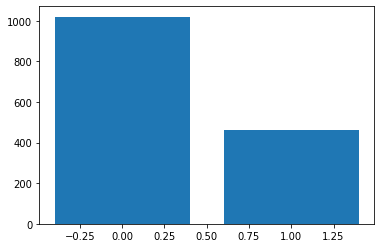

In [24]:
import matplotlib.pyplot as plt
 
#Find the count of shows and movies
counts = df["Sex"].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

In [25]:
# Creating a subset
#df_subset = df.loc[:, ['Sex', 'Pclass', 'Age', 'Fare']]
# Group by multiple categories
#df_subset.groupby(['Sex', 'Pclass']).mean()

In [26]:
# Creating a subset
df_subset = df.loc[:, ['cancer_staging','Case_Control','Weight loss','Change faeces/bowel movements','Abdominal pain/cramps general','Abdominal pain localized other','Constipation','Diarrhoea','Rectal bleeding']]
# Group by multiple categories
df_subset.groupby(['cancer_staging', 'Case_Control']).mean()

,,Weight loss,Change faeces/bowel movements,Abdominal pain/cramps general,Abdominal pain localized other,Constipation,Diarrhoea,Rectal bleeding
cancer_staging,Case_Control,,,,,,,
Extensive disease,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Limited disease,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
Stage IA,1,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.000000
Stage IB,1,0.238095,0.095238,0.000000,0.047619,0.142857,0.190476,0.000000
Stage IIA,1,0.200000,0.000000,0.000000,0.000000,0.200000,0.200000,0.000000
Stage IIB,1,0.166667,0.083333,0.000000,0.083333,0.333333,0.166667,0.000000
Stage IIIA,1,0.090909,0.000000,0.181818,0.090909,0.181818,0.272727,0.000000
Stage IIIB,1,0.000000,0.050000,0.050000,0.000000,0.050000,0.100000,0.000000
Stage IV,1,0.092593,0.000000,0.166667,0.148148,0.185185,0.111111,0.037037


In [27]:
df.groupby('cancer_staging').count()

,patientid,Case_Control,group_code,Sex,age_at_dendrite_date,edob,dendritedate,definite_check_exclude,differentiation,histology_1,early_stage,Pain general/multiple sites,chills,Fever,Fever.1,Fever.2,Weakness/tiredness general,Weakness/tiredness general.1,Weakness/tiredness general.2,Feeling ill,Feeling ill.1,Feeling ill.2,Fainting/syncope,Swelling,Sweating,Sweating.1,Chest pain NOS (Not otherwise specified),Chest pain NOS (Not otherwise specified).1,Chest pain NOS (Not otherwise specified).2,Chest pain NOS (Not otherwise specified).3,General Symptom/Complaint other,General Symptom/Complaint other.1,General and Unspecified Medical Exam/Eval-Complete,General and Unspecified Medical Exam/Eval-Complete.1,General and Unspecified Medical Exam/Eval-Complete.2,General and Unspecified Sensitivity Test,General and Unspecified Sensitivity Test.1,General and Unspecified Sensitivity Test.2,General and Unspecified Sensitivity Test.3,General and Unspecified Sensitivity Test.4,General and Unspecified Blood Test,General and Unspecified Blood Test.1,General and Unspecified Blood Test.2,General and Unspecified Blood Test.3,General and Unspecified Blood Test.4,General and Unspecified Blood Test.5,General and Unspecified Blood Test.6,General and Unspecified Preventive Imunisations/Medications,General and Unspecified Preventive Imunisations/Medications.1,General and Unspecified Preventive Imunisations/Medications.2,General and Unspecified Repair/Fixate-Suture/Cast/Prosthetic,General and Unspecified Dress/Press/Compress/Tamponade,General and Unspecified Dress/Press/Compress/Tamponade.1,General and Unspecified Dress/Press/Compress/Tamponade.2,General and Unspecified Dress/Press/Compress/Tamponade.3,General and Unspecified Other Therapeutic Procedure NEC,General and Unspecified Other Therapeutic Procedure NEC.1,General and Unspecified Other Therapeutic Procedure NEC.2,General and Unspecified Other Therapeutic Procedure NEC.3,General and Unspecified Other Therapeutic Procedure NEC.4,General and Unspecified Other Therapeutic Procedure NEC.5,General and Unspecified Other Therapeutic Procedure NEC.6,General and Unspecified Administrative Procedure,General and Unspecified Administrative Procedure.1,General and Unspecified Administrative Procedure.2,Adverse effect medical agent,Adverse effect medical agent.1,Adverse effect medical agent.2,Complication of medical treatment,Abnormal result investigation NOS,Lymph gland(s) enlarged/painful,Iron deficiency anaemia,Anaemia other/unspecified,Abdominal pain/cramps general,Abdominal pain epigastric,Abdominal pain epigastric.1,Heartburn,Abdominal pain localized other,Abdominal pain localized other.1,Dyspepsia/indigestion,Dyspepsia/indigestion.1,Flatulence/gas/belching,Nausea,Nausea.1,Nausea.2,Vomiting,Vomiting.1,Vomiting.2,Diarrhoea,Diarrhoea,Diarrhoea.1,Constipation,Constipation.1,Melaena,Rectal bleeding,Rectal bleeding.1,Change faeces/bowel movements,Change faeces/bowel movements.1,Mouth/tongue/lip symptom/complt,Swallowing problem,Swallowing problem.1,Abdominal Mass,Digestive symptom/complaint other,Digestive Medical Exam/Eval-Complete,Digestive Follow-up Encounter Unspecified,Digestive Follow-up Encounter Unspecified.1,Gastroenteritis presumed infection,Mouth/tongue/lip disease,Oesophagus disease,Stomach function disorder,Eye pain,Visual disturbance other,Abdominal Eye movements,Eye Medical Exam/Eval-Complete,Eye Other Reason for Encounter NEC,Conjunctivitis infectious,Blepharitis/stye/chalazion,ICataract,Ear pain/earache,Hearing complaint,Plugged feeling ear,Otitis externa,Eustachian salpingitis,Excessive ear wax,Excessive ear wax.1,Excessive ear wax.2,Heart pain,Palpitations/awareness of heart,Swollen ankles/oedema,Swollen ankles/oedema.1,Swollen ankles/oedema.2,Swollen ankles/oedema.3,Swollen ankles/oedema.4,Cardiovascular Medical Exam/Eval-Complete,Cardiovascular Medical Exam/Eval-Complete.1,Cardiovascular Medical Exam/Eval-Complete.2,Cardiovascular Medical Exam/Eval-Complete.3,Cardiovascular Medical Exam/Eva

In [28]:
df.groupby('Sex')['cancer_staging'].sum()

Sex
0    Stage IVStage IVStage IVStage IIBStage IVStage...
1    Stage IAStage IIBStage IVStage IAStage IVStage...
Name: cancer_staging, dtype: object

In [29]:
#create another dataframe for symptoms target
dfsymtar=df[['cancer_staging','Case_Control','Weight loss','Change faeces/bowel movements','Abdominal pain/cramps general','Abdominal pain localized other','Constipation','Diarrhoea','Rectal bleeding']]

In [30]:
df['age_at_consultationA01_1st'].head()

0    71.638603
1          NaN
2          NaN
3          NaN
4          NaN
Name: age_at_consultationA01_1st, dtype: float64

In [31]:
df['dendritedate'].head()

0    24-May-99
1    24-May-99
2    24-May-99
3    24-May-99
4    24-May-99
Name: dendritedate, dtype: object

In [32]:
corr = df.corr()
corr

,patientid,Case_Control,group_code,Sex,age_at_dendrite_date,edob,differentiation,histology_1,early_stage,Pain general/multiple sites,chills,Fever,Fever.1,Fever.2,Weakness/tiredness general,Weakness/tiredness general.1,Weakness/tiredness general.2,Feeling ill,Feeling ill.1,Feeling ill.2,Fainting/syncope,Swelling,Sweating,Sweating.1,Chest pain NOS (Not otherwise specified),Chest pain NOS (Not otherwise specified).1,Chest pain NOS (Not otherwise specified).2,Chest pain NOS (Not otherwise specified).3,General Symptom/Complaint other,General Symptom/Complaint other.1,General and Unspecified Medical Exam/Eval-Complete,General and Unspecified Medical Exam/Eval-Complete.1,General and Unspecified Medical Exam/Eval-Complete.2,General and Unspecified Sensitivity Test,General and Unspecified Sensitivity Test.1,General and Unspecified Sensitivity Test.2,General and Unspecified Sensitivity Test.3,General and Unspecified Sensitivity Test.4,General and Unspecified Blood Test,General and Unspecified Blood Test.1,General and Unspecified Blood Test.2,General and Unspecified Blood Test.3,General and Unspecified Blood Test.4,General and Unspecified Blood Test.5,General and Unspecified Blood Test.6,General and Unspecified Preventive Imunisations/Medications,General and Unspecified Preventive Imunisations/Medications.1,General and Unspecified Preventive Imunisations/Medications.2,General and Unspecified Repair/Fixate-Suture/Cast/Prosthetic,General and Unspecified Dress/Press/Compress/Tamponade,General and Unspecified Dress/Press/Compress/Tamponade.1,General and Unspecified Dress/Press/Compress/Tamponade.2,General and Unspecified Dress/Press/Compress/Tamponade.3,General and Unspecified Other Therapeutic Procedure NEC,General and Unspecified Other Therapeutic Procedure NEC.1,General and Unspecified Other Therapeutic Procedure NEC.2,General and Unspecified Other Therapeutic Procedure NEC.3,General and Unspecified Other Therapeutic Procedure NEC.4,General and Unspecified Other Therapeutic Procedure NEC.5,General and Unspecified Other Therapeutic Procedure NEC.6,General and Unspecified Administrative Procedure,General and Unspecified Administrative Procedure.1,General and Unspecified Administrative Procedure.2,Adverse effect medical agent,Adverse effect medical agent.1,Adverse effect medical agent.2,Complication of medical treatment,Abnormal result investigation NOS,Lymph gland(s) enlarged/painful,Iron deficiency anaemia,Anaemia other/unspecified,Abdominal pain/cramps general,Abdominal pain epigastric,Abdominal pain epigastric.1,Heartburn,Abdominal pain localized other,Abdominal pain localized other.1,Dyspepsia/indigestion,Dyspepsia/indigestion.1,Flatulence/gas/belching,Nausea,Nausea.1,Nausea.2,Vomiting,Vomiting.1,Vomiting.2,Diarrhoea,Diarrhoea,Diarrhoea.1,Constipation,Constipation.1,Melaena,Rectal bleeding,Rectal bleeding.1,Change faeces/bowel movements,Change faeces/bowel movements.1,Mouth/tongue/lip symptom/complt,Swallowing problem,Swallowing problem.1,Abdominal Mass,Digestive symptom/complaint other,Digestive Medical Exam/Eval-Complete,Digestive Follow-up Encounter Unspecified,Digestive Follow-up Encounter Unspecified.1,Gastroenteritis presumed infection,Mouth/tongue/lip disease,Oesophagus disease,Stomach function disorder,Eye pain,Visual disturbance other,Abdominal Eye movements,Eye Medical Exam/Eval-Complete,Eye Other Reason for Encounter NEC,Conjunctivitis infectious,Blepharitis/stye/chalazion,ICataract,Ear pain/earache,Hearing complaint,Plugged feeling ear,Otitis externa,Eustachian salpingitis,Excessive ear wax,Excessive ear wax.1,Excessive ear wax.2,Heart pain,Palpitations/awareness of heart,Swollen ankles/oedema,Swollen ankles/oedema.1,Swollen ankles/oedema.2,Swollen ankles/oedema.3,Swollen ankles/oedema.4,Cardiovascular Medical Exam/Eval-Complete,Cardiovascular Medical Exam/Eval-Complete.1,Cardiovascular Medical Exam/Eval-Complete.2,Cardiovascular Medical Exam/Eval-Complete.3,Cardiovascular Medical Exam/Eval-Complete.4,Cardiovascular Medical 

The correlation coefficient ranges from -1 to 1. The closer it is to -1 or 1 the better! The closer it is to 0 the worse.

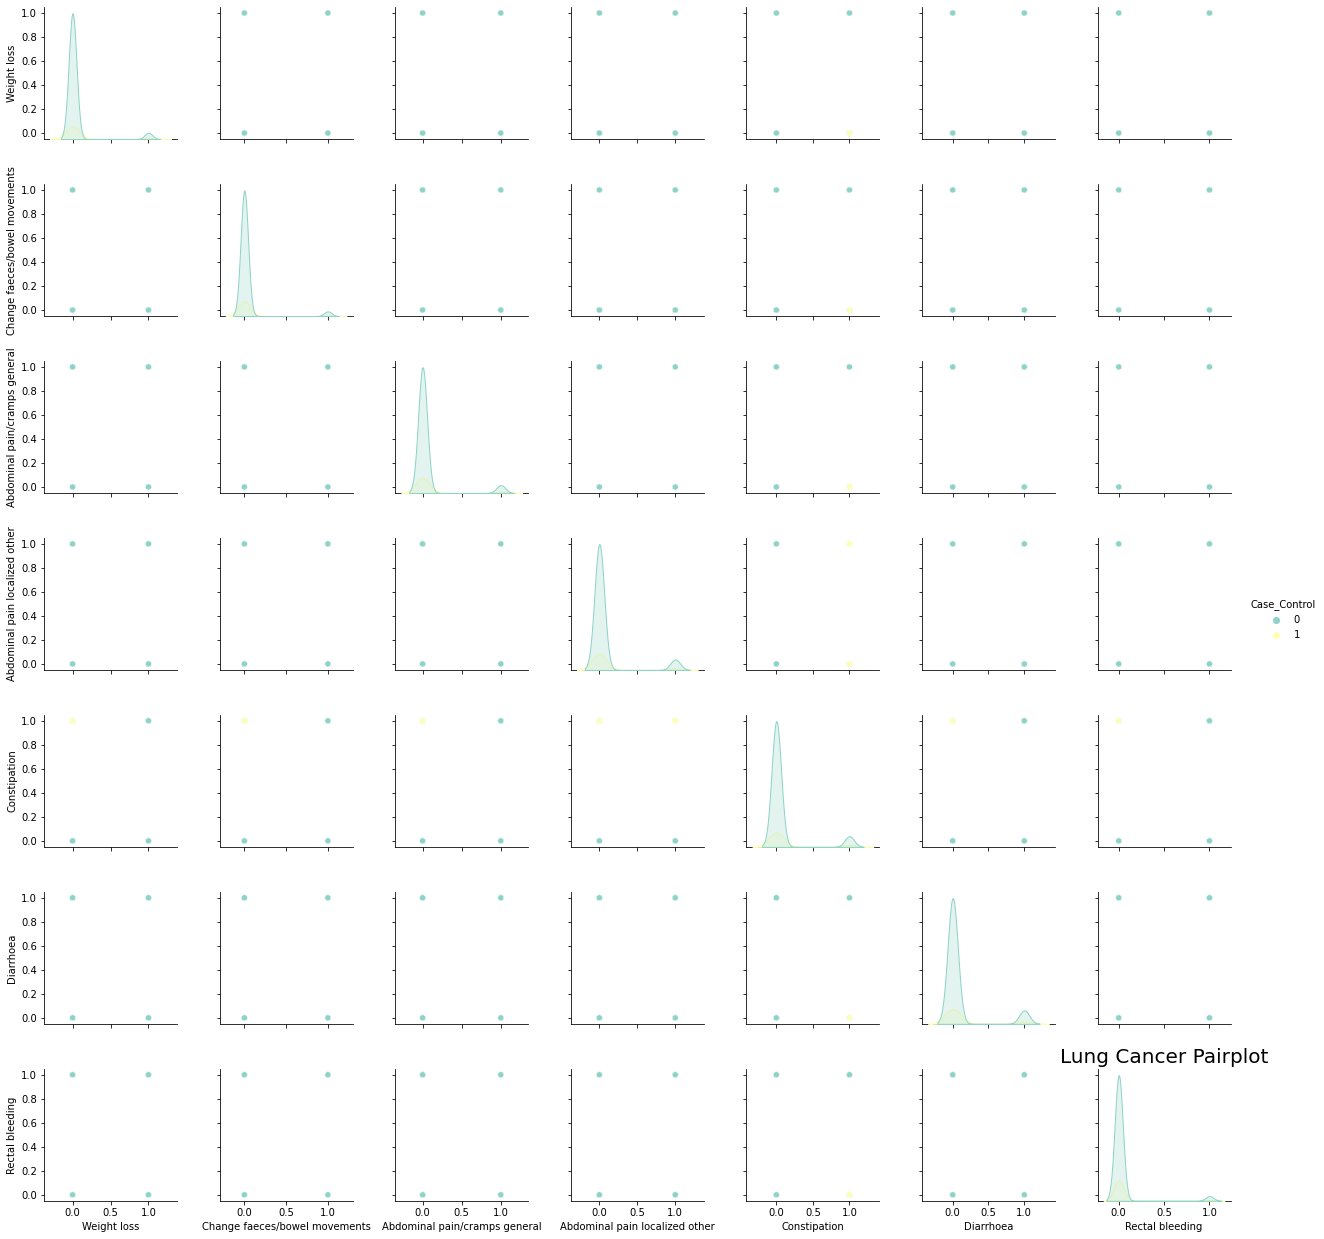

In [33]:
g = sns.pairplot(dfsymtar, hue='Case_Control', palette='Set3')
g = plt.savefig("case_control.png")
plt.title('Lung Cancer Pairplot',fontsize =20)
#g = legend.set_title('Lung Cancer Pair plot')
g = plt.savefig("case_control.png")

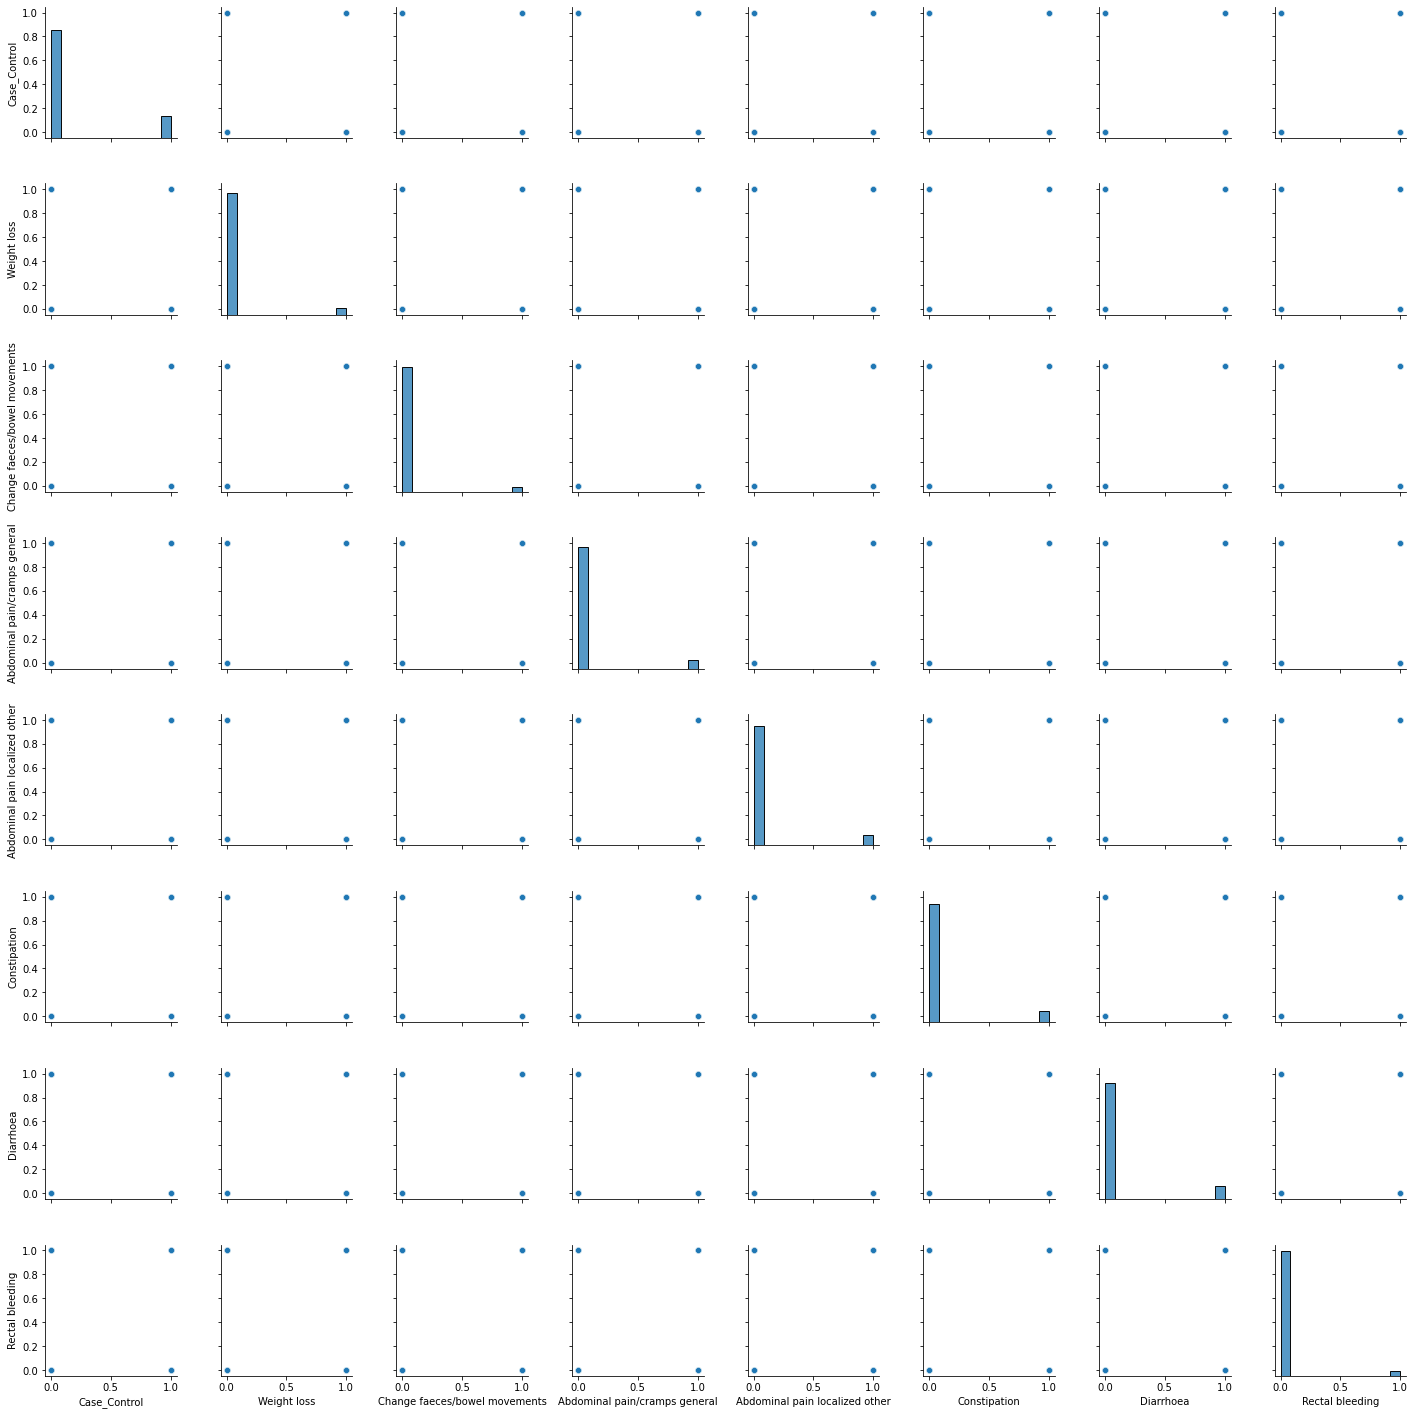

In [34]:
pairplot(dfsymtar)

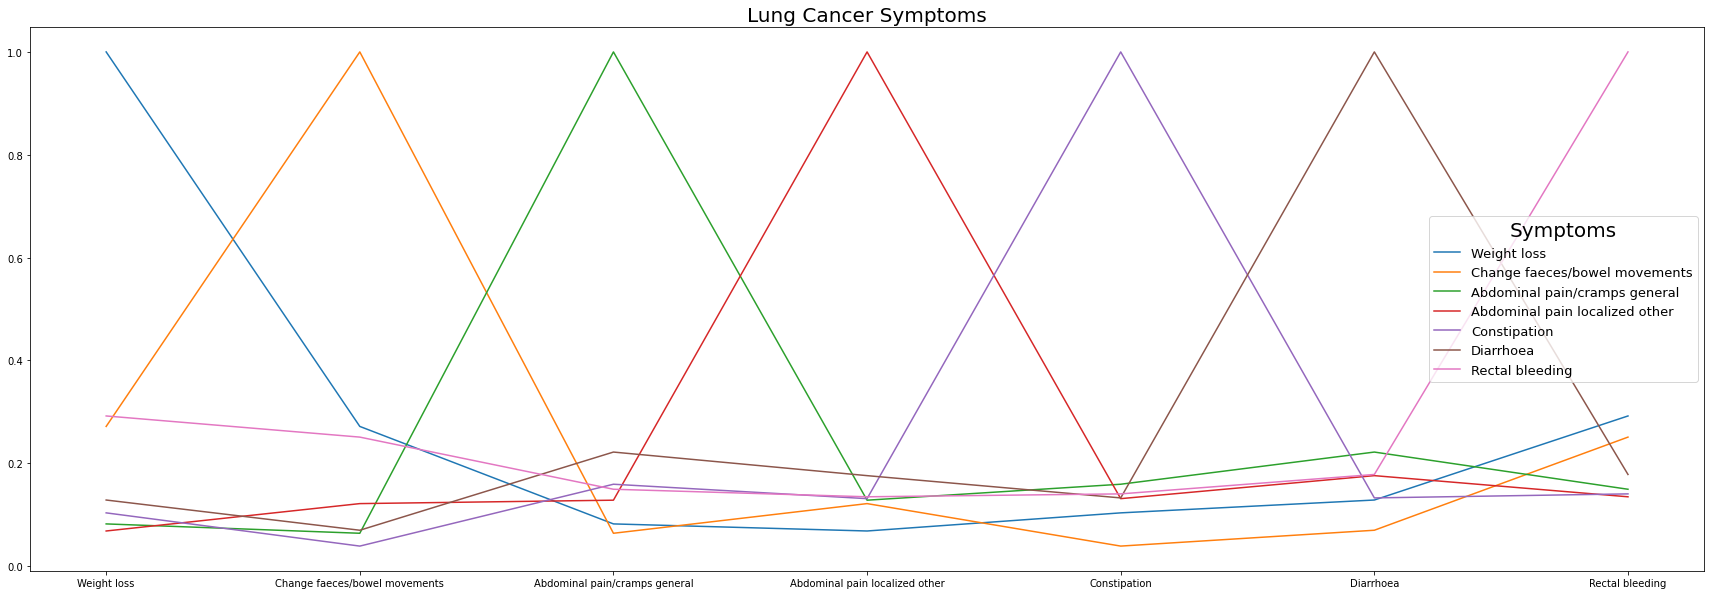

In [35]:
#dfsymptoms=df[['Weight loss','Change faeces/bowel movements','Abdominal pain/cramps general','Abdominal pain localized other','Constipation','Diarrhoea','Rectal bleeding']]
dfsymptoms.corr().plot(legend = True,figsize = (30,10))
plt.rcParams['legend.fontsize'] = '15'
plt.title('Lung Cancer Symptoms',fontsize =20)
plt.legend(fontsize=13, title='Symptoms',title_fontsize=20)
g = plt.savefig("Lung cancer Symptoms.png")
#g = legend.set_title('Lung Cancer Pair plot')

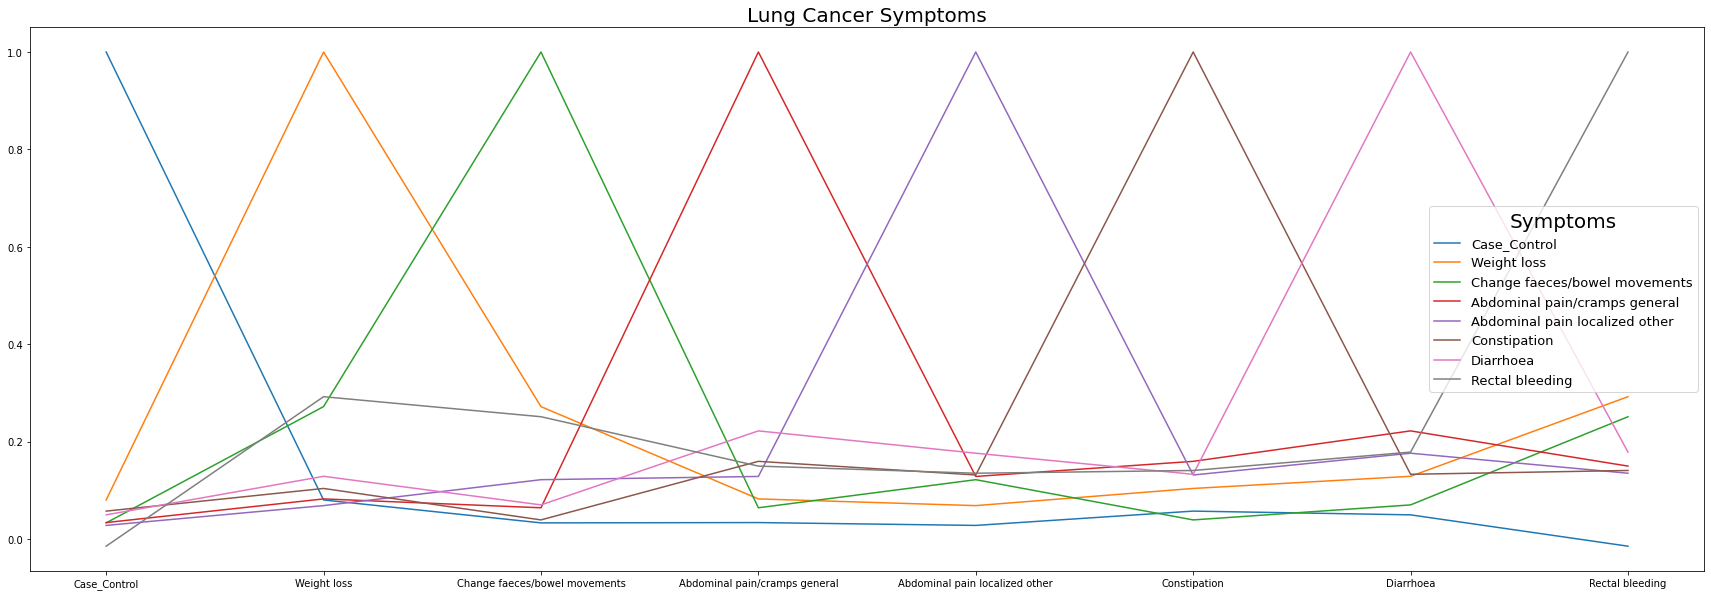

In [36]:
dfsymtar.corr().plot(legend = True,figsize = (30,10))
plt.rcParams['legend.fontsize'] = '15'
plt.title('Lung Cancer Symptoms',fontsize =20)
plt.legend(fontsize=13, title='Symptoms',title_fontsize=20)
g = plt.savefig("Lung cancer Symptoms.png")
#g = legend.set_title('Lung Cancer Pair plot')

In [37]:
pd.set_option('display.max_columns', None)
df.head()

,patientid,Case_Control,group_code,Sex,age_at_dendrite_date,edob,dendritedate,definite_check_exclude,differentiation,histology_1,cancer_staging,early_stage,Pain general/multiple sites,chills,Fever,Fever.1,Fever.2,Weakness/tiredness general,Weakness/tiredness general.1,Weakness/tiredness general.2,Feeling ill,Feeling ill.1,Feeling ill.2,Fainting/syncope,Swelling,Sweating,Sweating.1,Chest pain NOS (Not otherwise specified),Chest pain NOS (Not otherwise specified).1,Chest pain NOS (Not otherwise specified).2,Chest pain NOS (Not otherwise specified).3,General Symptom/Complaint other,General Symptom/Complaint other.1,General and Unspecified Medical Exam/Eval-Complete,General and Unspecified Medical Exam/Eval-Complete.1,General and Unspecified Medical Exam/Eval-Complete.2,General and Unspecified Sensitivity Test,General and Unspecified Sensitivity Test.1,General and Unspecified Sensitivity Test.2,General and Unspecified Sensitivity Test.3,General and Unspecified Sensitivity Test.4,General and Unspecified Blood Test,General and Unspecified Blood Test.1,General and Unspecified Blood Test.2,General and Unspecified Blood Test.3,General and Unspecified Blood Test.4,General and Unspecified Blood Test.5,General and Unspecified Blood Test.6,General and Unspecified Preventive Imunisations/Medications,General and Unspecified Preventive Imunisations/Medications.1,General and Unspecified Preventive Imunisations/Medications.2,General and Unspecified Repair/Fixate-Suture/Cast/Prosthetic,General and Unspecified Dress/Press/Compress/Tamponade,General and Unspecified Dress/Press/Compress/Tamponade.1,General and Unspecified Dress/Press/Compress/Tamponade.2,General and Unspecified Dress/Press/Compress/Tamponade.3,General and Unspecified Other Therapeutic Procedure NEC,General and Unspecified Other Therapeutic Procedure NEC.1,General and Unspecified Other Therapeutic Procedure NEC.2,General and Unspecified Other Therapeutic Procedure NEC.3,General and Unspecified Other Therapeutic Procedure NEC.4,General and Unspecified Other Therapeutic Procedure NEC.5,General and Unspecified Other Therapeutic Procedure NEC.6,General and Unspecified Administrative Procedure,General and Unspecified Administrative Procedure.1,General and Unspecified Administrative Procedure.2,Adverse effect medical agent,Adverse effect medical agent.1,Adverse effect medical agent.2,Complication of medical treatment,Abnormal result investigation NOS,Lymph gland(s) enlarged/painful,Iron deficiency anaemia,Anaemia other/unspecified,Abdominal pain/cramps general,Abdominal pain epigastric,Abdominal pain epigastric.1,Heartburn,Abdominal pain localized other,Abdominal pain localized other.1,Dyspepsia/indigestion,Dyspepsia/indigestion.1,Flatulence/gas/belching,Nausea,Nausea.1,Nausea.2,Vomiting,Vomiting.1,Vomiting.2,Diarrhoea,Diarrhoea,Diarrhoea.1,Constipation,Constipation.1,Melaena,Rectal bleeding,Rectal bleeding.1,Change faeces/bowel movements,Change faeces/bowel movements.1,Mouth/tongue/lip symptom/complt,Swallowing problem,Swallowing problem.1,Abdominal Mass,Digestive symptom/complaint other,Digestive Medical Exam/Eval-Complete,Digestive Follow-up Encounter Unspecified,Digestive Follow-up Encounter Unspecified.1,Gastroenteritis presumed infection,Mouth/tongue/lip disease,Oesophagus disease,Stomach function disorder,Eye pain,Visual disturbance other,Abdominal Eye movements,Eye Medical Exam/Eval-Complete,Eye Other Reason for Encounter NEC,Conjunctivitis infectious,Blepharitis/stye/chalazion,ICataract,Ear pain/earache,Hearing complaint,Plugged feeling ear,Otitis externa,Eustachian salpingitis,Excessive ear wax,Excessive ear wax.1,Excessive ear wax.2,Heart pain,Palpitations/awareness of heart,Swollen ankles/oedema,Swollen ankles/oedema.1,Swollen ankles/oedema.2,Swollen ankles/oedema.3,Swollen ankles/oedema.4,Cardiovascular Medical Exam/Eval-Complete,Cardiovascular Medical Exam/Eval-Complete.1,Cardiovascular Medical Exam/Eval-Complete.2,Cardiovascular Medical Exam/Eval-Complete.3,Cardiovascular M

In [38]:
#The signs are 
#Rectal examination,Abdominal pain/cramps general
#Tenderness on palpation of abdomen 
dfsigns = df[['Rectal bleeding','Rectal bleeding.1','Abdominal pain/cramps general']]

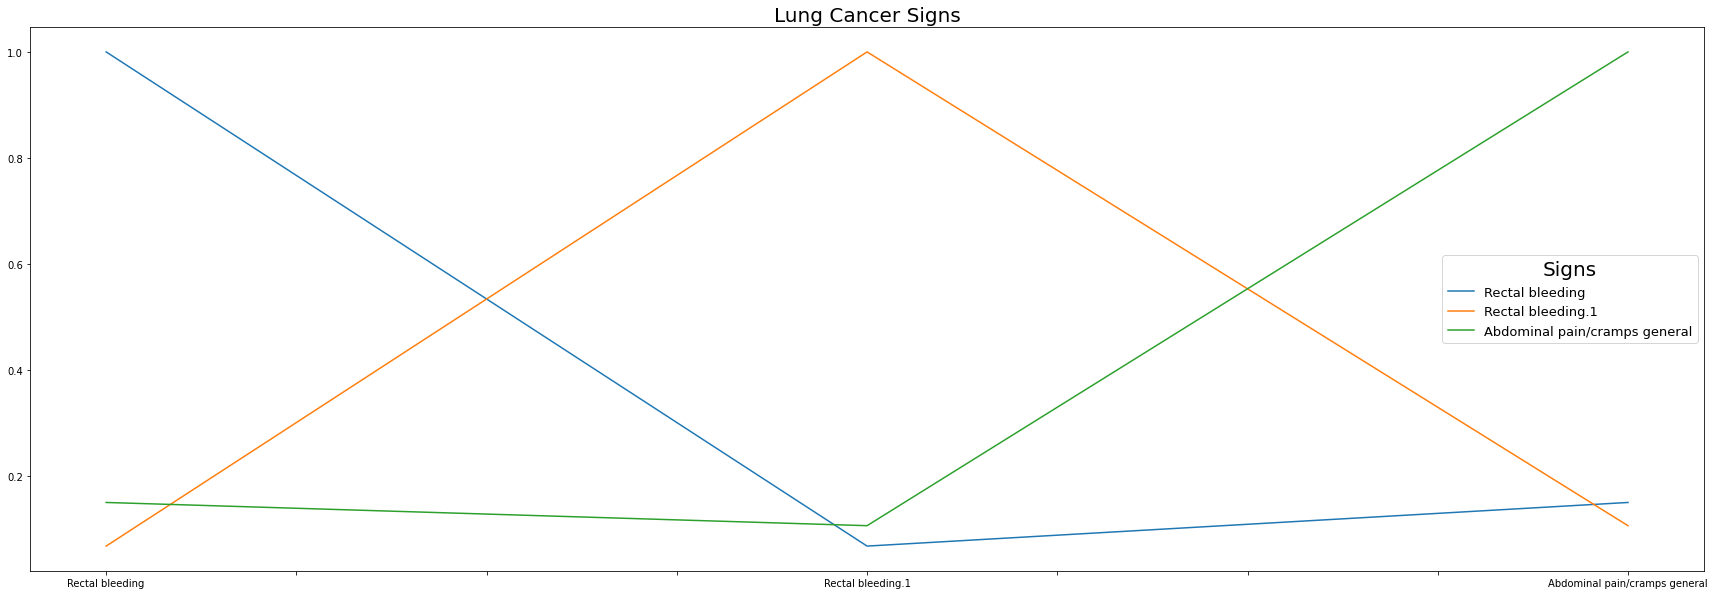

In [39]:
dfsigns.corr().plot(legend = True,figsize = (30,10))
plt.rcParams['legend.fontsize'] = '15'
plt.title('Lung Cancer Signs',fontsize =20)
plt.legend(fontsize=13, title='Signs',title_fontsize=20)
g = plt.savefig("Lung cancer Signs.png")
#g = legend.set_title('Lung Cancer Pair plot')

In [40]:
corr = dfsigns.corr()
corr

,Rectal bleeding,Rectal bleeding.1,Abdominal pain/cramps general
Rectal bleeding,1.000000,0.067232,0.149575
Rectal bleeding.1,0.067232,1.000000,0.105748
Abdominal pain/cramps general,0.149575,0.105748,1.000000


The results above did not imply causality just relationships among the variable/features

In [41]:
#import seaborn as sns

#sns.heatmap(df.corr(), vmin=-1, vmax=1,annot=True,cmap="rocket_r")
#plt.show()

In [42]:
#import seaborn as sns

#sns.heatmap(dfsigns.corr(), vmin=-1, vmax=1,
#annot=True,cmap="rocket_r")
#plt.show()

In [43]:
#import seaborn as sns

#sns.heatmap(dfsymtar.corr(), vmin=-1, vmax=1,
#annot=True,cmap="rocket_r")
#plt.show()

Investigations are:Faecal occult blood test (FOBT)  

1.   Faecal occult blood test(FOBT)
2.   Hemoglobin (blood test)
3.   Sugar (blood test) / Diabetes 
4.   Birth Date 'age_at_dendrite_date'



In [44]:
#df['','','','','age_at_dendrite_date']
#dfinv = [[]]

KeyError: ignored

In [45]:

obj = dfsymtar.groupby('cancer_staging')
display(obj)

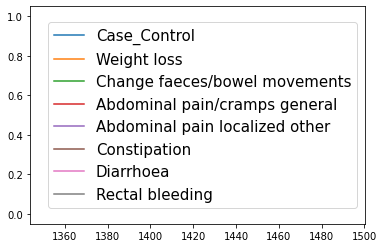

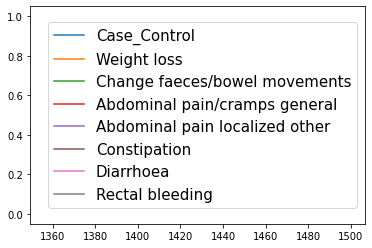

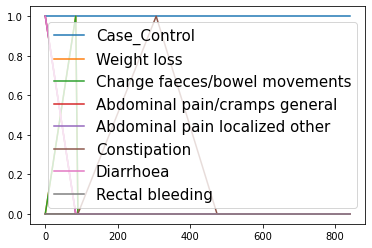

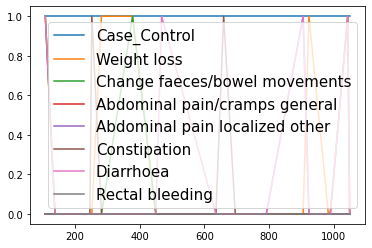

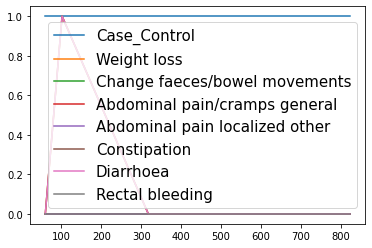

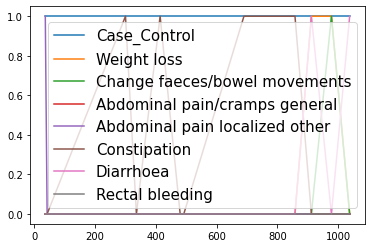

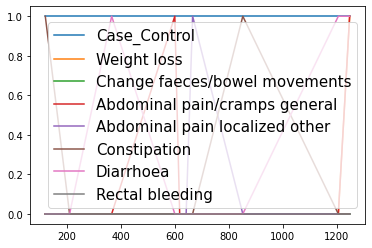

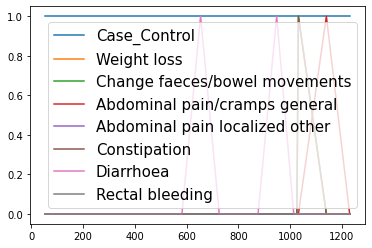

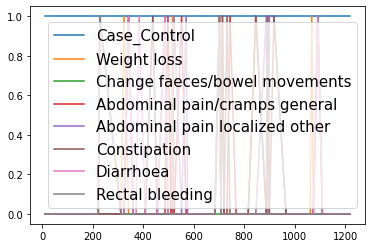

In [46]:
obj = dfsymtar.groupby('cancer_staging').plot(legend=True)

In [47]:
#obj.groups

AttributeError: ignored

In [50]:

obj = dfsymtar.groupby('cancer_staging')
display(obj)

In [51]:
obj.get_group('Extensive disease')

,cancer_staging,Case_Control,Weight loss,Change faeces/bowel movements,Abdominal pain/cramps general,Abdominal pain localized other,Constipation,Diarrhoea,Rectal bleeding
1422,Extensive disease,1,0,0,0,0,0,0,0



This shows that the patients with extensive diseases do not have the selected
symptoms - wierd??




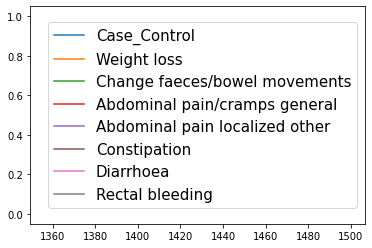

In [52]:
obj.get_group('Limited disease').plot(legend=True)

The difference between Extensive diseases and the limited diseases is the Diarrhoea,quite surprising??

Modelling

In [53]:
#Modelling
from sklearn.linear_model import LogisticRegression

X = pd.DataFrame(df, columns = ['Weight loss','Change faeces/bowel movements','Abdominal pain/cramps general','Abdominal pain localized other','Constipation','Diarrhoea','Rectal bleeding'])
y = pd.DataFrame(df, columns=['Case_Control'])
# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

clf = LogisticRegression(random_state=1).fit(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
!pip install explainerdashboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 305 kB 5.2 MB/s 
     |████████████████████████████████| 57 kB 4.8 MB/s 
     |████████████████████████████████| 470 kB 54.1 MB/s 
     |████████████████████████████████| 46 kB 4.6 MB/s 
     |████████████████████████████████| 564 kB 45.2 MB/s 
     |████████████████████████████████| 197 kB 52.3 MB/s 
     |████████████████████████████████| 61 kB 148 kB/s 
     |████████████████████████████████| 9.8 MB 20.9 MB/s 
     |████████████████████████████████| 64 kB 3.2 MB/s 
     |████████████████████████████████| 357 kB 53.0 MB/s 
     |████████████████████████████████| 136 kB 55.5 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67326 sha256=e51e791827c0bccae1729143b366e48cbab05453e3adf6345dbf06e3a3ca27e2
  Stored in directory: /root/.cache/pip/wheels/33/76/fe/99227ff871766e7284bb88d3d28e2f4886b8ec04d669033478
  Created w

In [56]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

explainer = ClassifierExplainer(clf, X_test, y_test)
ExplainerDashboard(explainer, mode='inline').run(port=8051)


Note: model_output='probability' is currently not supported for linear classifiers models with shap. So defaulting to model_output='logodds' If you really need probability outputs use shap='kernel' instead.
Note: shap values for shap='linear' get calculated against X_background, but paramater X_background=None, so using X instead...
Generating self.shap_explainer = shap.LinearExplainer(model, X)...
Building ExplainerDashboard..
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...


/usr/local/lib/python3.7/dist-packages/explainerdashboard/explainer_plots.py:370: RuntimeWarning:

invalid value encountered in double_scalars



Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8051))


<IPython.core.display.Javascript object>